# Introduction

---

Companies in the telecommunications (telco) industry that want to stay in business will need to address the churn rate. How can you make it smaller? Make better use of data, ensure efficient customer care, invest in new technologies, and create a memorable customer experience with a few strategies. The churn rate is something that affects all companies in the telco industry, where customer volatility is high. The churn rate affects more than just telecommunications companies. Instead, businesses of all sizes must retain as many customers as possible in order to maintain a stable, continuous, and high-quality relationship. Various strategies can be used to accomplish this, and digital solutions and innovations will undoubtedly play an important role.

It is normal for any company doing business to gain and lose customers. Customers may discover you one day and become loyal customers over time; however, even customers who have been loyal to a brand for years may decide to switch to a competitor. In the telecom industry, the churn rate, or rate of customer abandonment, captures this phenomenon.

# Data Description

---

The data is taken from Kaggle, a large community-driven data-analysis platform. The datasets consisted of two spreadsheet documents, the first being the "Telecom Company Call-Center-Dataset" and the second being the "Telecom Churn Rate Dataset". Since our analysis specifically focuses on the churn rate of customers, we shall be using the second dataset.

The following columns are contained in the dataset:

- customerID: Customer ID
- genderCustomer: customers's gender (female, male)
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- PartnerWhether: the customer is married or not (Yes, No)
- Dependents: Whether the customer has dependents (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer uses a phone service or not (Yes, No)
- MultipleLines: Whether the customer uses multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s ISP (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer purchased online security (Yes, No, No internet service)
- OnlineBackup: Whether the customer made an online backup (Yes, No, No internet service)
- DeviceProtection: Whether the customer purchased device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer streams TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer streams movies or not (Yes, No, No internet service)
- Contract: The contract period of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer posses paperless billing or not (Yes, No)
- PaymentMethod: The customer’s preferred payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer per month
- TotalCharges: The total amount charged to the customer
- numAdminTickets: The number of Admin Ticket
- numTechTickets: The number of Tech Ticket
- Churn: Whether the customer churned or not (Yes or No)

# Data Cleaning

---


In [1]:
# import dependencies
library(caret)
library(randomForest)
library(doParallel)
library(readxl)
library(moments)
library(cowplot)
library(ggplot2)
library(graphics)
library(stats)
library(dplyr)
library(tidyverse)
library(glmnet)
library(pROC)
library(rpart)
library(rpart.plot)
library(emmeans)
library(MASS)
library(broom)




 ダウンロードされたパッケージは、以下にあります 
 	/var/folders/p0/xr8c62gn79qghlvd5xp31xr40000gn/T//RtmpEBcu8o/downloaded_packages 


## Load dataset

In [2]:
df = read_excel("Telecom Churn Rate Dataset.xlsx")

## Data description

In [3]:
str(df)

tibble [7,048 × 23] (S3: tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7048] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr [1:7048] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7048] 0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr [1:7048] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7048] "No" "No" "No" "No" ...
 $ tenure          : num [1:7048] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7048] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7048] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7048] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7048] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7048] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7048] "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr [1:7048] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7048] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7048] "No" "No" "No" 

> As can be seen from the above there are 23 columns and 7048 data entries.

In [5]:
head(df, 10)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,0,0,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes


> These are the first 10 data entries. It can be noticed that there seem to be a lot of categorical data items and multiple states have been reflected in their first few entries.

## Data preprocessing

---

Step 1: ' ' in 'TotalCharges'. So we have to drop ' ' to convert 'TotalCharges' to numerical.

In [4]:
df[is.na(df$TotalCharges),]

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,⋯,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NA,0,0,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,Two year,No,Mailed check,20.25,NA,5,0,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,⋯,Yes,Yes,Two year,No,Mailed check,80.85,NA,0,0,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,Two year,No,Mailed check,25.75,NA,1,0,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,⋯,Yes,No,Two year,No,Credit card (automatic),56.05,NA,0,0,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,Two year,No,Mailed check,19.85,NA,0,0,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,Two year,No,Mailed check,25.35,NA,0,0,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,Two year,No,Mailed check,20.00,NA,5,0,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,One year,Yes,Mailed check,19.70,NA,0,0,No


> The above data show row entries with NA values in `TotalCharges`

In [5]:
df <- na.omit(df)

Step 2: Checking for the number of duplicated entries (and dropping them if found).

In [8]:
print("No. of duplicate entries:");
sum(duplicated(df))

[1] "No. of duplicate entries:"


[1] 5

In [6]:
df[duplicated(df),]

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2254-DLXRI,Female,0,No,No,1,Yes,Yes,Fiber optic,No,⋯,No,No,Month-to-month,Yes,Mailed check,79.15,79.15,5,0,No
2121-JAFOM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,⋯,Yes,Yes,Two year,Yes,Credit card (automatic),115.55,8312.40,0,0,No
0380-ZCSBI,Male,0,No,No,10,Yes,No,No,No internet service,⋯,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,198.70,0,0,No
6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,⋯,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,0,0,Yes
6583-QGCSI,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,⋯,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35,0,5,Yes


> The above contain the duplicated entries and thus have to be removed.

In [7]:
df <- unique(df) # drop duplicate entries

In [8]:
str(df)
df_cleaned <- df

tibble [7,032 × 23] (S3: tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7032] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr [1:7032] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7032] 0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr [1:7032] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7032] "No" "No" "No" "No" ...
 $ tenure          : num [1:7032] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7032] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7032] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7032] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7032] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7032] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7032] "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr [1:7032] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7032] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7032] "No" "No" "No" 

Step 4: Creating numerical and categorical lists.

In [9]:
unique(df$numAdminTickets)

[1] 0 1 5 2 4 3

In [10]:
# distinction is based on the number of different values in the column
columns <- names(df)

categoric_columns <- vector(mode="character")
numeric_columns <- vector(mode="character")

for (i in columns) {
  if (length(unique(df[[i]])) >= 6) {
    numeric_columns <- c(numeric_columns, i)
  } else {
    categoric_columns <- c(categoric_columns, i)
  }
}

categoric_columns <- categoric_columns[categoric_columns != "Churn"] # Excluding 'Churn'

In [14]:
numeric_columns

[1] "customerID"      "tenure"          "MonthlyCharges"  "TotalCharges"   
[5] "numAdminTickets" "numTechTickets"

Step 5: Label Encoding

In [12]:
df_cleaned <- df

for (col in categoric_columns) {
  df_cleaned[[col]] <- as.numeric(as.factor(df[[col]]))
}

df_cleaned[["Churn"]] <- as.numeric(as.factor(df[["Churn"]]))


Step 6: Summary Statistics of Numerical Data

In [13]:
summary(df_cleaned[, numeric_columns])

  customerID            tenure      MonthlyCharges    TotalCharges   
 Length:7032        Min.   : 1.00   Min.   : 18.25   Min.   :  18.8  
 Class :character   1st Qu.: 9.00   1st Qu.: 35.59   1st Qu.: 401.4  
 Mode  :character   Median :29.00   Median : 70.35   Median :1397.5  
                    Mean   :32.42   Mean   : 64.80   Mean   :2283.3  
                    3rd Qu.:55.00   3rd Qu.: 89.86   3rd Qu.:3794.7  
                    Max.   :72.00   Max.   :118.75   Max.   :8684.8  
 numAdminTickets  numTechTickets  
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000  
 Mean   :0.5149   Mean   :0.4202  
 3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :5.0000   Max.   :9.0000  

In [14]:
# Defining the pallete for future plots
palette <- c("#6a0d83", "#ce4993", "#ee5d6c", "#fb9062")
palette2 <- c("#ce4993", "#6a0d83", "#ee5d6c", "#fb9062")

## Data Storytelling - Data Imbalance


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union




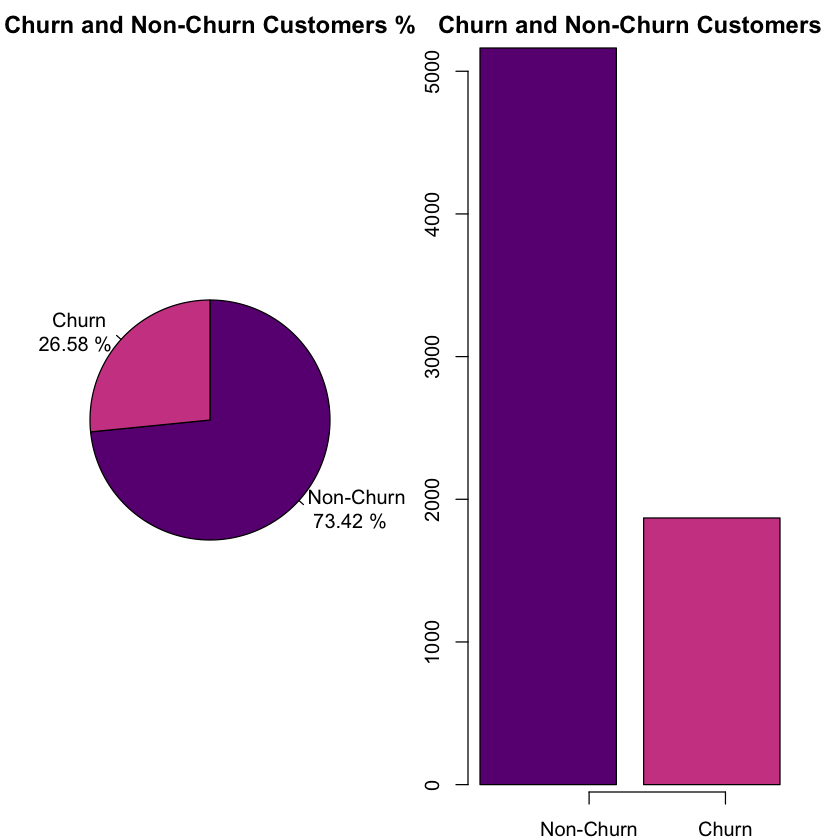

In [19]:
# Calculate values for pie chart
l1 <- table(df_cleaned$Churn)
pie_values <- c(l1[1] / sum(l1) * 100, l1[2] / sum(l1) * 100)

# Define color palette
palette <- c("#6A0D83", "#CE4993")

# Create pie chart and bar chart side by side
par(mfrow=c(1,2), mar=c(2,2,2,2))
pie(x = pie_values, labels = c(paste("Non-Churn \n", round(pie_values[1], 2), "%"), paste("Churn \n", round(pie_values[2], 2), "%")), 
    main="Churn and Non-Churn Customers %",
    col=palette, 
    init.angle=90, 
    border="black", 
    clockwise=TRUE, 
    density=NULL, 
    angle=c(0, pie_values[1]/100*360), 
    )

barplot(l1, main="Churn and Non-Churn Customers", 
        col=palette, 
        border="black", 
        xaxt="n",
        names.arg=c("Non-Churn Customers", "Churn Customers"))
axis(side=1, at=1:2, labels=c("Non-Churn", "Churn"))

It can be seen that the above data points show a significant difference between churned and non-churned customers. Though one may wonder if this would induce some bias in the analysis, we can argue otherwise. This difference is naturally reflectant of the real world where customers would leave a service if another competing service provide better deals, customer service or other significant features. 

[1] "Distribution for each numerical feature"


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


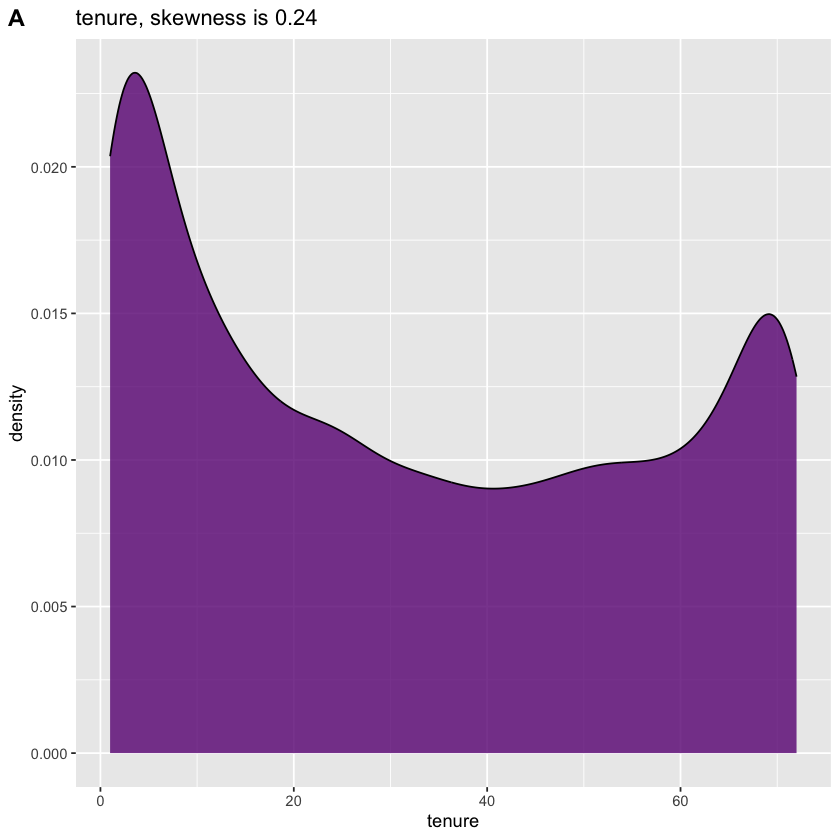

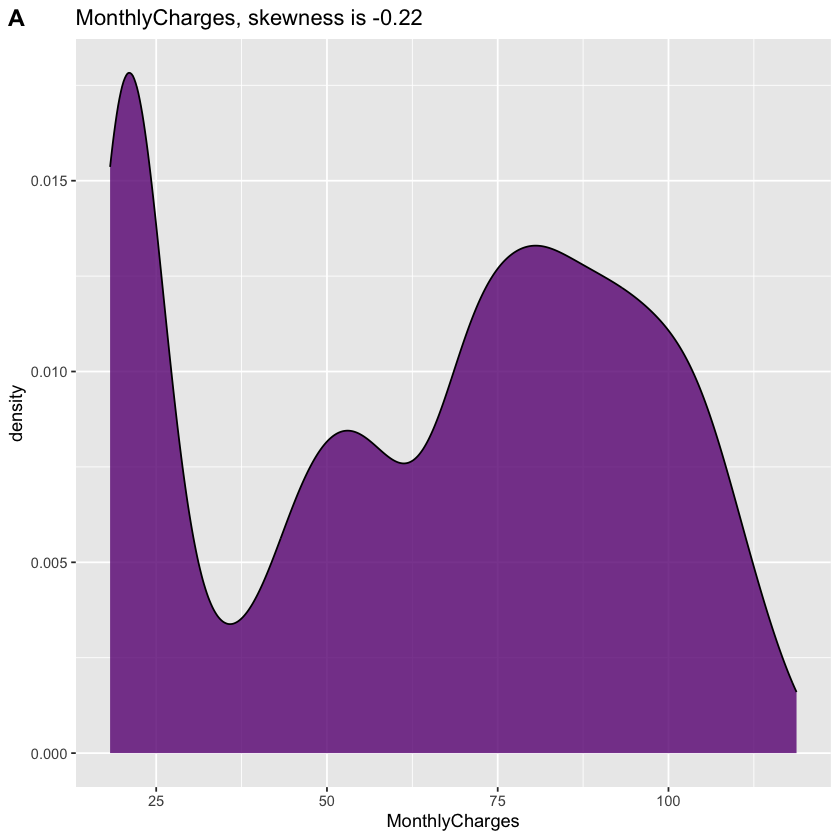

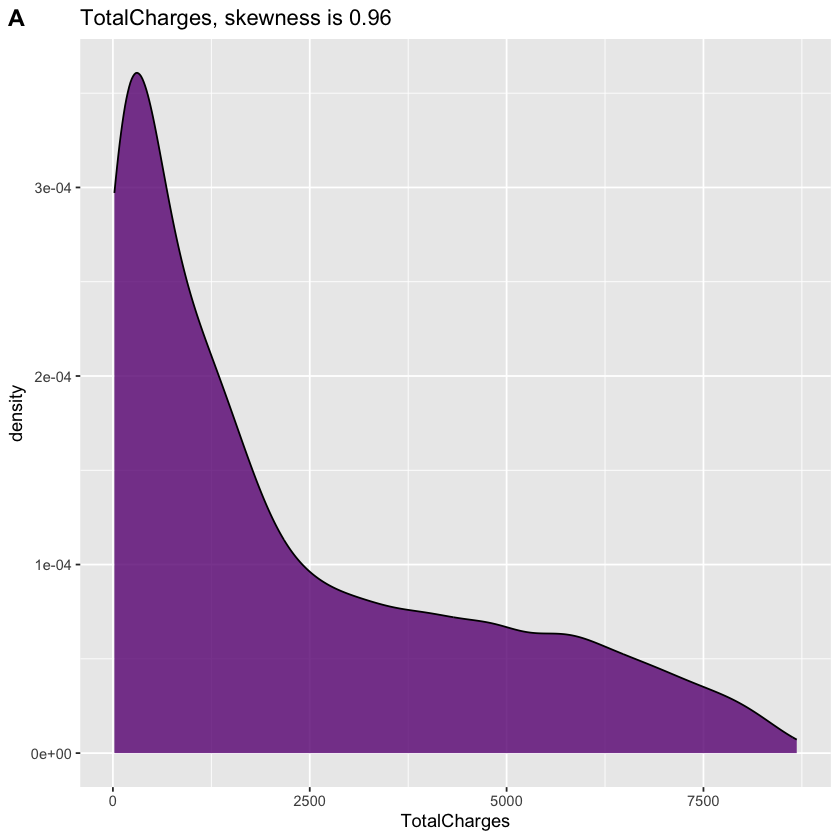

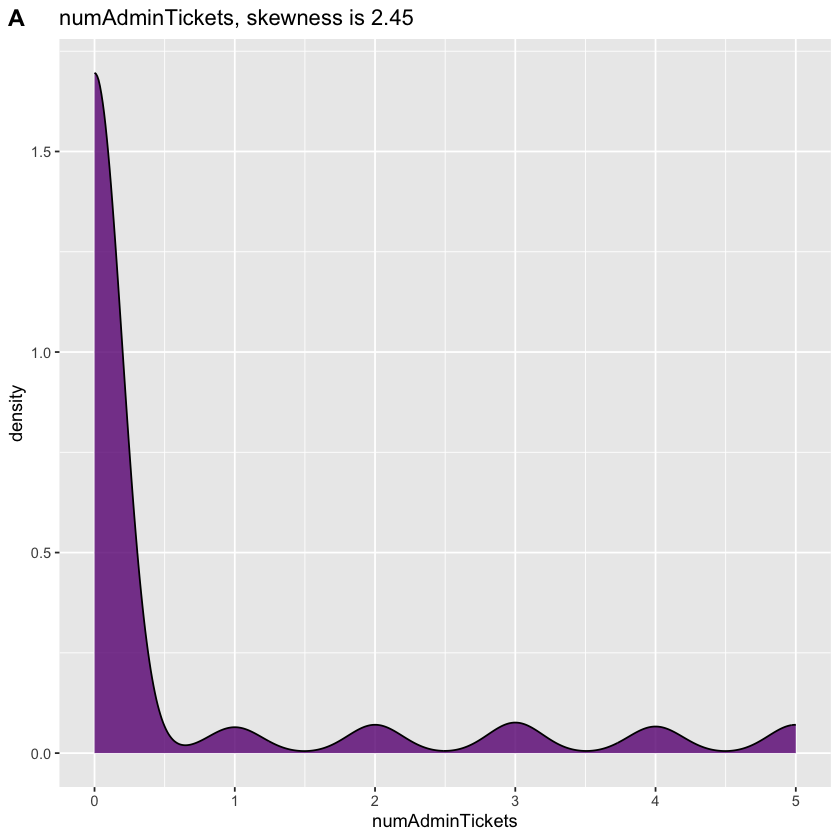

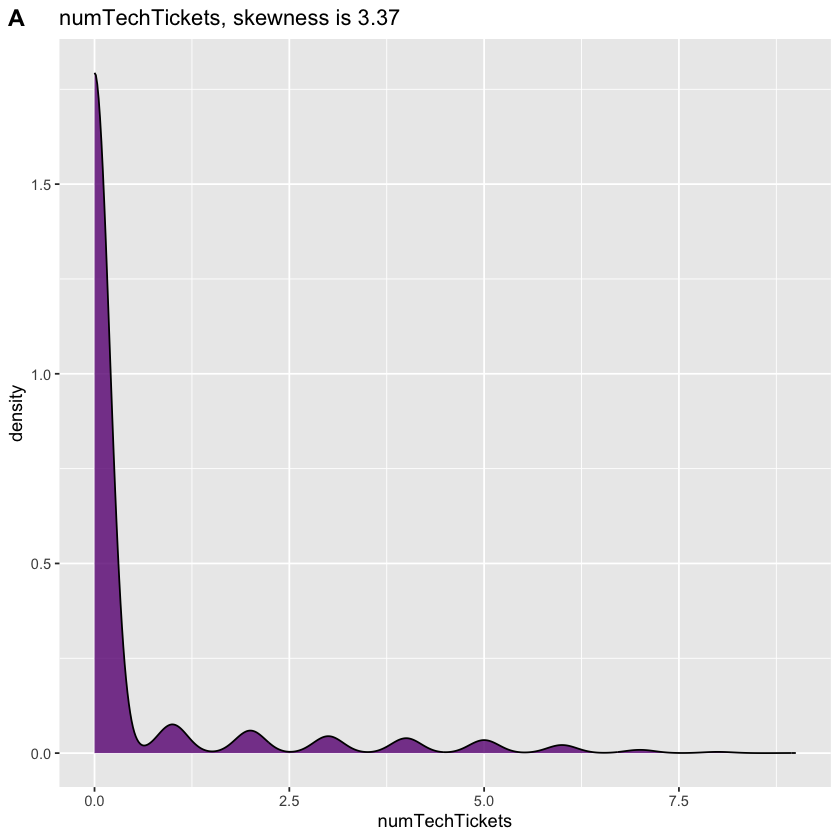

In [22]:
# Define function to create distribution plots
dist_custom <- function(dataset, columns_list, rows, cols, subtitle) {
  # Calculate number of plots
  num_plots <- rows * cols
  
  # Check if number of columns is greater than the number of plots
  if (length(columns_list) < num_plots) {
    stop("Number of columns is less than the number of plots.")
  }
  
  # Create a list of plots
  plots <- list()
  for (i in 1:num_plots) {
    # Calculate the row and column number for each plot
    row <- ((i - 1) %/% cols) + 1
    col <- (i - 1) %% cols + 1
    
    # Create a ggplot for the current column
    plots[[i]] <- ggplot(dataset, aes_string(x = columns_list[i])) +
      geom_density(fill = "#6A0D83", alpha = 0.8) +
      labs(title = paste0(columns_list[i], ", skewness is ", round(skewness(dataset[[columns_list[i]]]), 2)))
  }
  
  # Combine the plots into a single figure
  fig <- cowplot::plot_grid(plotlist = plots, nrow = rows, ncol = cols, labels = "AUTO")
  
  # Add the suptitle to the figure
  fig <- ggdraw(fig) + draw_label(subtitle, fontface = "bold", y = 1, size = 14)
  
  # Return the figure
  return(fig)
}

print("Distribution for each numerical feature")
# Call the function per feature
dist_custom(dataset = df_cleaned, columns_list = numeric_columns[2], rows = 1, cols = 1, subtitle = "")
dist_custom(dataset = df_cleaned, columns_list = numeric_columns[3], rows = 1, cols = 1, subtitle = "")
dist_custom(dataset = df_cleaned, columns_list = numeric_columns[4], rows = 1, cols = 1, subtitle = "")
dist_custom(dataset = df_cleaned, columns_list = numeric_columns[5], rows = 1, cols = 1, subtitle = "")
dist_custom(dataset = df_cleaned, columns_list = numeric_columns[6], rows = 1, cols = 1, subtitle = "")

# Logistic Regression

In [17]:
# Converting columns in the cleaned dataset df1 into factors
df_cleaned <- df_cleaned %>%
  mutate(across(c(gender, SeniorCitizen, Partner, Dependents, PhoneService, 
                  MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, 
                  TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn), 
                   factor, exclude = NULL))
  

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(...)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


In [18]:
# Specifying the independent variables we want to include in the model
# We predict churn based on the remaining variables
model <- glm(Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + PhoneService + MultipleLines + 
             InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV +
             StreamingMovies + Contract + PaperlessBilling + PaymentMethod + MonthlyCharges + TotalCharges +
             numAdminTickets + numTechTickets,
             family = binomial(link = "logit"), data = df_cleaned)

In [19]:
summary(model) 


Call:
glm(formula = Churn ~ gender + SeniorCitizen + Partner + Dependents + 
    tenure + PhoneService + MultipleLines + InternetService + 
    OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + 
    StreamingTV + StreamingMovies + Contract + PaperlessBilling + 
    PaymentMethod + MonthlyCharges + TotalCharges + numAdminTickets + 
    numTechTickets, family = binomial(link = "logit"), data = df_cleaned)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7730  -0.4598  -0.0797   0.2386   3.8509  

Coefficients: (7 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.4285935  1.0245216   1.394 0.163197    
gender2           -0.0957337  0.0764895  -1.252 0.210718    
SeniorCitizen2     0.2698725  0.1045992   2.580 0.009878 ** 
Partner2          -0.0549046  0.0943263  -0.582 0.560519    
Dependents2       -0.0930284  0.1081090  -0.861 0.389511    
tenure            -0.0683092  0.0072093  

The variables with a low p-value are the most statistically significant in this logistic regression (less than 0.05 in our definition). The following variables, according to the output, are statistically significant:

eniorCitizen, tenure, MultipleLines, OnlineSecurity, StreamingTV, StreamingMovies, Contract, PaperlessBilling, MonthlyCharges, numTechTickets 
(Note: removed InternetService and TotalCharges since they can be determined from the other variables)  

1. The magnitude of these variables' effects on the likelihood of churn are shown by the coefficients for these variables. We can observe that, for instance, a one-unit increase in tenure is connected to a factor of exp(-0.0828574) = 0.9205, or a 7.95% drop in the probability of churn. To comprehend how other variables affect the outcome variable, we might similarly read the coefficients for those other variables.

2. At the bottom of the output, we see that the residual deviance is lower than the null deviance. The null deviance in logistic regression represents the deviance of the model with only an intercept term and no predictor variables, with no info about the response variable as well. On the other hand, the residual deviance includes the predictor variables. It is the variation in the response variable that remains unexplained by the model after accounting for the effects of the predictor variables.  

In all, this indicates that the model is doing a better job of predicting churn (H1), compared to chance alone (H0) - establishing that there is indeed a relation between our predictor variables and the churn rate. 



#### However, some issues are discerned from the results of the regression. 

1. Several missing values exist for the MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies variables. This may be due to linear dependence between variables or sparse data. However, it is noted that MultipleLines is statistically significant based on its p-value output.  

2. The AIC value of the model is 4309.2 - we will attempt to reduce this through the optimizations given below. Additionally, the missing values for 7 variables may indicate that the model has too many variables involved in the prediction process.  

> To reduce the complexity of the data, we remove the variables mentioned in point 2, as they may be adding noise to the model. This is to make the model more parsimonious and to improve the balance between model complexity and predictive accuracy. 

In [20]:
# Stepwise selection to choose the best set of predictor variables for a logistic regression model in R. 

# Load the MASS package for the stepAIC function

# Fit the full model with all predictor variables
full_model <- glm(Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + 
                  PhoneService + MultipleLines + InternetService + OnlineSecurity + 
                  OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies + 
                  Contract + PaperlessBilling + PaymentMethod + MonthlyCharges + TotalCharges + 
                  numAdminTickets + numTechTickets, family = binomial(link = "logit"), data = df_cleaned)

# Use stepwise selection to choose the best set of predictor variables
step_model <- stepAIC(full_model, direction = "both")




 次のパッケージを付け加えます: ‘MASS’ 


 以下のオブジェクトは ‘package:dplyr’ からマスクされています:

    select




Start:  AIC=4309.16
Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + 
    PhoneService + MultipleLines + InternetService + OnlineSecurity + 
    OnlineBackup + DeviceProtection + TechSupport + StreamingTV + 
    StreamingMovies + Contract + PaperlessBilling + PaymentMethod + 
    MonthlyCharges + TotalCharges + numAdminTickets + numTechTickets


Step:  AIC=4309.16
Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + 
    MultipleLines + InternetService + OnlineSecurity + OnlineBackup + 
    DeviceProtection + TechSupport + StreamingTV + StreamingMovies + 
    Contract + PaperlessBilling + PaymentMethod + MonthlyCharges + 
    TotalCharges + numAdminTickets + numTechTickets

                   Df Deviance    AIC
- DeviceProtection  1   4257.2 4307.2
- TechSupport       1   4257.2 4307.2
- Partner           1   4257.5 4307.5
- Dependents        1   4257.9 4307.9
- StreamingTV       1   4257.9 4307.9
- StreamingMovies   1   4257.9 4307.9
- MonthlyCharges    1  

In [28]:
# Show the final selected model
summary(step_model)
alias(step_model)


Call:
glm(formula = Churn ~ SeniorCitizen + tenure + MultipleLines + 
    InternetService + OnlineSecurity + OnlineBackup + StreamingTV + 
    StreamingMovies + Contract + PaperlessBilling + PaymentMethod + 
    MonthlyCharges + TotalCharges + numAdminTickets + numTechTickets, 
    family = binomial(link = "logit"), data = df_cleaned)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7407  -0.4631  -0.0794   0.2375   3.8423  

Coefficients: (4 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.748e+00  6.495e-01   2.691 0.007121 ** 
SeniorCitizen2     2.837e-01  1.026e-01   2.765 0.005694 ** 
tenure            -6.920e-02  7.181e-03  -9.637  < 2e-16 ***
MultipleLines2    -3.094e-01  3.044e-01  -1.016 0.309441    
MultipleLines3     5.370e-01  1.126e-01   4.769 1.85e-06 ***
InternetService2   1.932e+00  3.431e-01   5.632 1.78e-08 ***
InternetService3  -2.005e+00  3.906e-01  -5.133 2.85e-07 ***
Onli

Model :
Churn ~ SeniorCitizen + tenure + MultipleLines + InternetService + 
    OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + 
    Contract + PaperlessBilling + PaymentMethod + MonthlyCharges + 
    TotalCharges + numAdminTickets + numTechTickets

Complete :
                 (Intercept) SeniorCitizen2 tenure MultipleLines2
OnlineSecurity2  0           0              0      0             
OnlineBackup2    0           0              0      0             
StreamingTV2     0           0              0      0             
StreamingMovies2 0           0              0      0             
                 MultipleLines3 InternetService2 InternetService3
OnlineSecurity2  0              0                1               
OnlineBackup2    0              0                1               
StreamingTV2     0              0                1               
StreamingMovies2 0              0                1               
                 OnlineSecurity3 OnlineBackup3 StreamingTV3 Str

In [23]:
# Simplifying the data for the linearly dependent variables
df_cleaned_Updated <- df_cleaned%>%mutate(across(.cols=c('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                          'TechSupport', 'StreamingTV', 'StreamingMovies'),
                          .fns = ~ifelse(. == 'No internet service', 'No', .)))

df_cleaned_Updated <- df_cleaned_Updated%>%mutate(MultipleLines=ifelse(MultipleLines == 'No phone service', 'No', MultipleLines))

In [24]:
# Building a second model based on the new dataset
second_model <- glm(Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + 
                    PhoneService + MultipleLines + InternetService + OnlineSecurity +
                    OnlineBackup + DeviceProtection + TechSupport + StreamingTV + 
                    StreamingMovies + Contract + PaperlessBilling + PaymentMethod + 
                    MonthlyCharges + TotalCharges + numAdminTickets + numTechTickets, 
                    family = binomial(link = "logit"), data = df_cleaned_Updated)

# Use stepwise selection to choose the best set of predictor variables
step_model2 <- stepAIC(second_model, direction = "both")

Start:  AIC=4309.16
Churn ~ gender + SeniorCitizen + Partner + Dependents + tenure + 
    PhoneService + MultipleLines + InternetService + OnlineSecurity + 
    OnlineBackup + DeviceProtection + TechSupport + StreamingTV + 
    StreamingMovies + Contract + PaperlessBilling + PaymentMethod + 
    MonthlyCharges + TotalCharges + numAdminTickets + numTechTickets

                   Df Deviance    AIC
- DeviceProtection  1   4257.2 4307.2
- TechSupport       1   4257.2 4307.2
- PhoneService      1   4257.5 4307.5
- Partner           1   4257.5 4307.5
- Dependents        1   4257.9 4307.9
- StreamingTV       1   4257.9 4307.9
- StreamingMovies   1   4257.9 4307.9
- MonthlyCharges    1   4257.9 4307.9
- OnlineBackup      1   4258.1 4308.1
- gender            1   4258.7 4308.7
<none>                  4257.2 4309.2
- OnlineSecurity    1   4259.7 4309.7
- numAdminTickets   1   4260.1 4310.1
- MultipleLines     1   4262.7 4312.7
- TotalCharges      1   4262.7 4312.7
- SeniorCitizen     1   4263.

In [25]:
summary(step_model2)


Call:
glm(formula = Churn ~ SeniorCitizen + tenure + PhoneService + 
    MultipleLines + InternetService + OnlineSecurity + OnlineBackup + 
    StreamingTV + StreamingMovies + Contract + PaperlessBilling + 
    PaymentMethod + MonthlyCharges + TotalCharges + numAdminTickets + 
    numTechTickets, family = binomial(link = "logit"), data = df_cleaned_Updated)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7407  -0.4631  -0.0794   0.2375   3.8423  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        7.736e-01  2.617e-01   2.956 0.003115 ** 
SeniorCitizen2     2.837e-01  1.026e-01   2.765 0.005694 ** 
tenure            -6.920e-02  7.181e-03  -9.637  < 2e-16 ***
PhoneService2      5.779e-01  3.324e-01   1.738 0.082127 .  
MultipleLines      2.685e-01  5.631e-02   4.769 1.85e-06 ***
InternetService2   1.932e+00  3.431e-01   5.632 1.78e-08 ***
InternetService3  -2.133e+00  5.937e-01  -3.592 0.000328 ***
OnlineSecurity    -1.7

In [26]:
# Get p-values for each predictor variable
pvalues <- summary(step_model2)$coefficients[, 4]

# Get indices of significant predictor variables
sig_indices <- which(pvalues < 0.01)

# Get names of significant predictor variables
sig_vars <- names(coef(step_model2)[sig_indices])
print(sig_vars)
# remove totalCharges and InternetService 

 [1] "(Intercept)"       "SeniorCitizen2"    "tenure"           
 [4] "MultipleLines"     "InternetService2"  "InternetService3" 
 [7] "OnlineSecurity"    "Contract2"         "Contract3"        
[10] "PaperlessBilling2" "MonthlyCharges"    "numTechTickets"   


In [27]:
df2 <- df_cleaned_Updated[, c("SeniorCitizen", "tenure", "MultipleLines", "OnlineSecurity", 
                      "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
                      "MonthlyCharges", "numTechTickets")]
str(df2)


tibble [7,032 × 10] (S3: tbl_df/tbl/data.frame)
 $ SeniorCitizen   : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ tenure          : num [1:7032] 1 34 2 45 2 8 22 10 28 62 ...
 $ MultipleLines   : int [1:7032] 2 1 1 2 1 3 3 2 3 1 ...
 $ OnlineSecurity  : int [1:7032] 1 3 3 3 1 1 1 3 1 3 ...
 $ StreamingTV     : int [1:7032] 1 1 1 1 1 3 3 1 3 1 ...
 $ StreamingMovies : int [1:7032] 1 1 1 1 1 3 1 1 3 1 ...
 $ Contract        : Factor w/ 3 levels "1","2","3": 1 2 1 2 1 1 1 1 1 2 ...
 $ PaperlessBilling: Factor w/ 2 levels "1","2": 2 1 2 1 2 2 2 1 2 1 ...
 $ MonthlyCharges  : num [1:7032] 29.9 57 53.9 42.3 70.7 ...
 $ numTechTickets  : num [1:7032] 0 0 0 3 0 0 0 0 2 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:11] 489 754 937 1083 1341 3332 3827 4381 5221 6673 ...
  ..- attr(*, "names")= chr [1:11] "489" "754" "937" "1083" ...


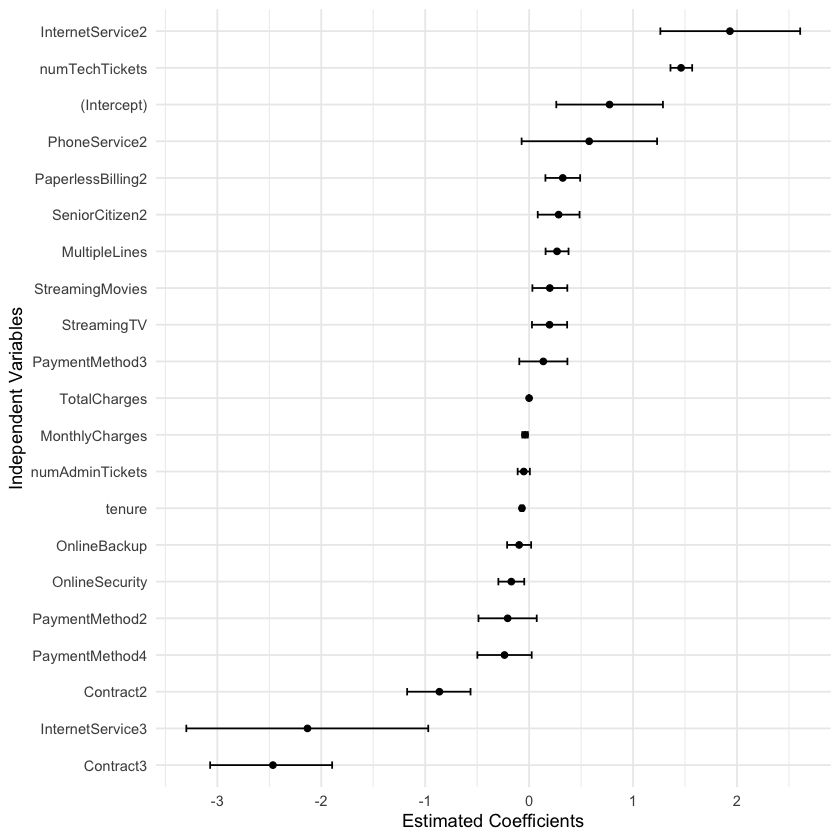

In [28]:


tidy_model <- tidy(step_model2, conf.int = TRUE)

ggplot(tidy_model, aes(x = reorder(term, estimate), y = estimate)) +
  geom_point() +
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = 0.2) +
  coord_flip() +
  labs(x = "Independent Variables", y = "Estimated Coefficients") +
  theme_minimal()


Type 'citation("pROC")' for a citation.


 次のパッケージを付け加えます: ‘pROC’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    cov, smooth, var


Setting levels: control = 1, case = 2

Setting direction: controls < cases



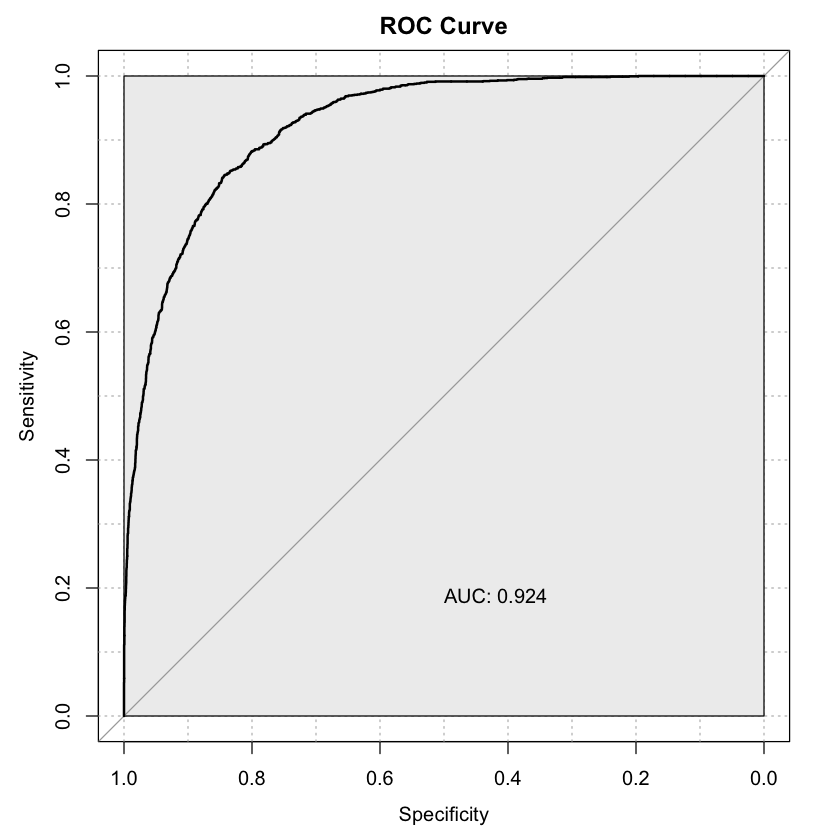

In [29]:
# Predict probabilities for the original data
df_cleaned_Updated$predicted_probability <- predict(step_model2, newdata = df_cleaned_Updated, type = "response")

# Create the ROC curve
roc_obj <- roc(df_cleaned_Updated$Churn, df_cleaned_Updated$predicted_probability)

# Plot the ROC curve
plot(roc_obj, print.auc = TRUE, print.auc.y = 0.2, grid = TRUE, grid.col = "gray", 
     grid.lwd = 1, grid.nx = 10, grid.ny = 10, max.auc.polygon = TRUE, 
     auc.polygon.col = "lightblue", main = "ROC Curve")

## F-test and 2-sample T-test


	F test to compare two variances

data:  log(df_cleaned$MonthlyCharges[df_cleaned$Churn == "2"]) and log(df_cleaned$MonthlyCharges[df_cleaned$Churn == "1"])
F = 0.5131, num df = 1868, denom df = 5162, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4764132 0.5533579
sample estimates:
ratio of variances 
         0.5131047 



	Welch Two Sample t-test

data:  log(df_cleaned$MonthlyCharges[df_cleaned$Churn == "2"]) and log(df_cleaned$MonthlyCharges[df_cleaned$Churn == "1"])
t = 20.954, df = 4604.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.2601657       Inf
sample estimates:
mean of x mean of y 
 4.229919  3.947586 


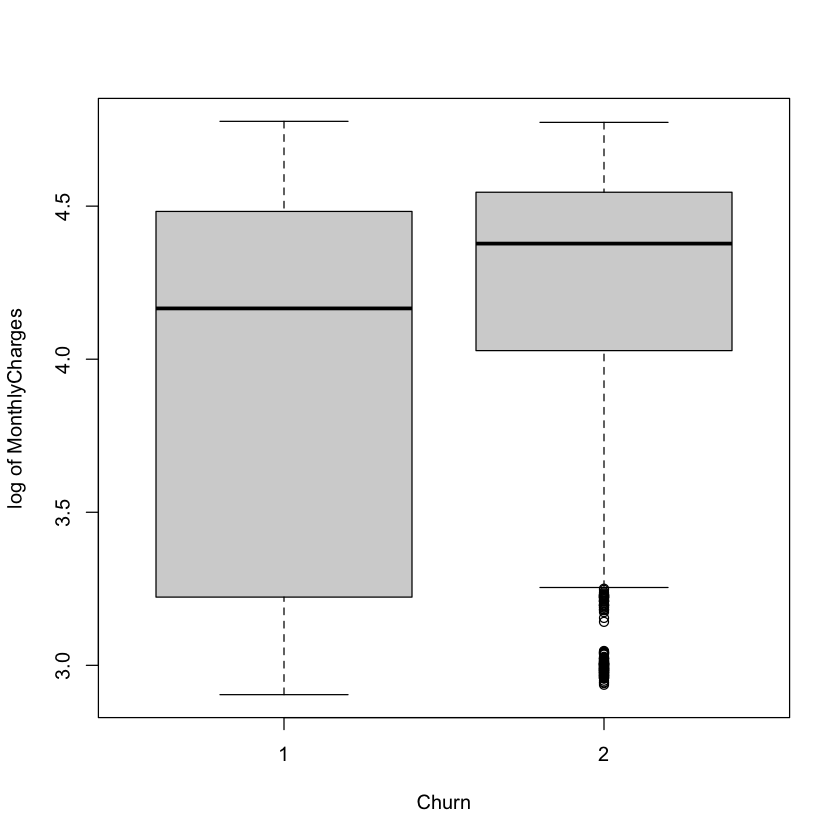

In [51]:
boxplot(log(df_cleaned$MonthlyCharges) ~ df_cleaned$Churn, xlab = 'Churn', ylab = 'log of MonthlyCharges')

var.test(log(df_cleaned$MonthlyCharges[df_cleaned$Churn == '2']), log(df_cleaned$MonthlyCharges[df_cleaned$Churn == '1']))

t.test(log(df_cleaned$MonthlyCharges[df_cleaned$Churn == '2']), log(df_cleaned$MonthlyCharges[df_cleaned$Churn == '1']), 
       alternative = 'greater', var.equal = F)

## Analysing the relation between paperlessbilling and tenure

In [39]:
#Convert PaperlessBilling into a factor
df_cleaned <- df_cleaned %>% 
    mutate(PaperlessBilling = as.factor(PaperlessBilling))

#Perform indepedendent samples t-test
t_test_result <- t.test(tenure ~ PaperlessBilling, data = df_cleaned)
t_test_result


	Welch Two Sample t-test

data:  tenure by PaperlessBilling
t = -0.4041, df = 6136.8, p-value = 0.6862
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -1.4097501  0.9278837
sample estimates:
mean in group 1 mean in group 2 
       32.27898        32.51991 


### Result

---
The p-value is 0.6862, which represents the probability of observing a t-value as extreme (or more) as -0.4041 under the null hypothesis (There is no difference in the average tenure between the two groups).

Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant evidence to suggest that there is a difference in the average tenure between customers with and without paperless billing.


## Analysing the relation between contract and tenure

---
To investigate if there is a significant difference in the average tenure between customers with different types of contracts, we first observe that this variable has more than 2 levels. Hence we cannot use the Welch t.test since it is desgined to compare the means of a continuous depenedent variable between two independent groups.

In this case we can use one-way Analysis of Variance (ANOVA) to compare the means of a continuous dependent variable across multiple groups.


In [40]:
df_cleaned <- df_cleaned %>% 
    mutate(Contract = as.factor(Contract))

#Perform indepedendent samples t-test
anova_result <- aov(tenure ~ Contract, data = df_cleaned)
anova_result
anova_table <- summary(anova_result)
anova_table[[1]]

Call:
   aov(formula = tenure ~ Contract, data = df_cleaned)

Terms:
                Contract Residuals
Sum of Squares   1962830   2273135
Deg. of Freedom        2      7029

Residual standard error: 17.98315
Estimated effects may be unbalanced

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Contract,2,1962830,981414.8995,3034.736,0
Residuals,7029,2273135,323.3938,NA,NA


### Result
---
The p-value is 0, which is less than the typical significance level of 0.05. This means that we can reject the null hypothesis, concluding that there is a significant difference in the average tenure between at least one pair of contract types

In [41]:
estimated_means <- emmeans(anova_result, ~ Contract)
post_hoc_result <- pairs(estimated_means, adjust = "tukey")
summary(post_hoc_result)

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Contract1 - Contract2,-24.03672,0.5505936,7029,-43.65602,3.723799e-12
2,Contract1 - Contract3,-39.03516,0.5247681,7029,-74.38555,3.723799e-12
3,Contract2 - Contract3,-14.99844,0.6415777,7029,-23.37743,3.723799e-12


The p-values have been adjusted for multiple comparisons using the Tukey method. For all three pairwise comparisons, the p-values are extremely small (3.723799e-12), which is much lower than the typical significance level of 0.05. This means that there is a statistically significant difference in the average tenure between each pair of contract types.

In conclusion, the Tukey's HSD test results indicate that there are significant differences in the average tenure between all three contract types. Customers with a month-to-month contract have a significantly lower average tenure compared to those with one-year and two-year contracts. Similarly, customers with a one-year contract have a significantly lower average tenure compared to those with a two-year contract.

## Identifying high-risk customers
---
With this in mind, we will now attempt to identify high-risk customers with regards to churn. To do this, we will first be use the logistic regression model, which models the relationship between churn (as the dependent variable) and multiple independent variables, such as demographics, services, contract type, and billing information. Logistic regression can help us identify the most important factors that contribute to churn and estimate the likelihood of a customer churning based on these factors, as shown previously.

### Summary of process
---
Feature Selection: Identify the most important features (independent variables) that have a significant impact on the target variable (churn). We will be using the variables identified earlier.

Train the Model: We will split our dataset into a training and testing set (e.g., 70% training, 30% testing). We will then train a logistic regression model on the training set using the selected features as predictors and churn as the target variable.

Model Evaluation: We will then evaluate the performance of the logistic regression model on the testing set using metrics like accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).

Predict Churn Probability: Once the model is trained and validated, we will use it to predict the probability of churn for each customer in your dataset. This will give us a probability score between 0 and 1 for each customer.

Set a Threshold: We will then determine a threshold for the churn probability above which customers will be considered high-risk. In our case, we have arbitrarily selected 0.7 as our threshold.

Identify High-Risk Customers: Apply the threshold to the predicted churn probabilities to classify customers as high-risk or low-risk. Customers with churn probabilities above the threshold will be considered high-risk.

In [35]:
# 2. Feature Selection: Correlation analysis 
data_filtered <- df2

# Add the Churn column back to the filtered dataset
data_filtered$Churn <- df_cleaned$Churn
# Convert Churn column to binary numeric values
data_filtered$Churn <- ifelse(data_filtered$Churn == 1, 1, 0)

data_filtered$customerID <- df_cleaned$customerID

# Convert all character columns to factors
data_filtered[] <- lapply(data_filtered, function(x) {
  if (is.character(x)) {
    as.factor(x)
  } else {
    x
  }
})

# Split data into training and testing sets
set.seed(42)
train_index <- sample(1:nrow(data_filtered), 0.7 * nrow(data_filtered))
train_data <- data_filtered[train_index, ]
test_data <- data_filtered[-train_index, ]

In [37]:
registerDoParallel(cores = 4) 
train_data$Churn <- as.factor(train_data$Churn)
test_data$Churn <- as.factor(test_data$Churn)
train_control <- trainControl(method = "cv", number = 5, allowParallel = TRUE)

In [38]:
model_churn <- train(Churn ~ . - customerID, data = train_data, method = "rf", ntree = 50, trControl = train_control)
model_tenure <- train(tenure ~ . - customerID - Churn, data = train_data, method = "rf", ntree = 50, trControl = train_control)


In [39]:
# Make predictions
predictions_churn <- predict(model_churn, test_data)
predictions_tenure <- predict(model_tenure, test_data)

# Show predictions
cat("Predicted Churn:\n")
print(predictions_churn)
cat("Predicted Tenure:\n")
print(predictions_tenure)


Predicted Churn:
   [1] 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
  [38] 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1
  [75] 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 [112] 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 [149] 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0
 [186] 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 [223] 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 [297] 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 [334] 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 [371] 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1
 [408] 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 [445] 1 1 

In [40]:
# Calculate performance metrics
churn_accuracy <- mean(predictions_churn == test_data$Churn)
tenure_mse <- mean((predictions_tenure - test_data$tenure)^2)

# Print results
cat("Churn accuracy:", churn_accuracy, "\n")
cat("Tenure MSE:", tenure_mse, "\n")

Churn accuracy: 0.8540284 
Tenure MSE: 232.6408 


In [43]:
# For the churn model
churn_importance_table <- importance(model_churn$finalModel)
print(churn_importance_table)

# For the tenure model
tenure_importance_table <- importance(model_tenure$finalModel)
print(tenure_importance_table)


                  MeanDecreaseGini
SeniorCitizen2            16.77852
tenure                   259.06470
MultipleLines             18.30251
OnlineSecurity           113.69732
StreamingTV               23.68789
StreamingMovies           24.80812
Contract2                 39.55250
Contract3                 68.72048
PaperlessBilling2         22.24676
MonthlyCharges           138.24271
numTechTickets           313.38971
                  IncNodePurity
SeniorCitizen2         12107.39
MultipleLines         172247.13
OnlineSecurity        173706.22
StreamingTV            76763.45
StreamingMovies        72846.92
Contract2             185467.26
Contract3             645845.47
PaperlessBilling2      16137.40
MonthlyCharges        256171.10
numTechTickets        109670.12


The Mean Decrease in Gini is a measure of variable importance in a Random Forest model. A higher value indicates a higher importance of that variable in making accurate predictions. The Gini impurity is a measure of how often a randomly chosen element from the dataset would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The decrease in Gini impurity measures how much the variable contributes to the homogeneity of the nodes and leaves in the resulting Random Forest model.

